In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

from scipy import linalg as LA

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import and examine data
A = pd.read_csv('A.csv', header=None)
A.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.266766,-0.398702,0.812796,0.893287,-0.014538,-0.929479,0.125179,-0.494490,-0.169221,0.037047,0.232773,0.575491,-0.555626,1.397407,0.545164,-0.689609,0.087320,0.032315,0.696251,0.997076
1,-0.042494,-0.548219,-0.256288,-1.574640,-0.644076,-0.542428,0.188623,-0.933062,0.030679,-2.338478,0.840790,-0.131609,-0.513925,0.231913,0.241767,0.393104,-1.621111,-0.890175,-1.761683,1.407437
2,-0.684837,-1.247358,1.428114,1.342918,-0.585114,0.650330,1.635522,1.778617,-0.239360,0.234857,-0.289563,1.167342,0.514959,-0.809796,0.484737,-1.626098,0.140166,0.566411,-1.214465,2.184662
3,-0.221513,-0.634948,-0.508088,-2.333585,-0.750172,0.333853,-0.059960,-0.436063,-0.058795,0.703817,0.820986,0.280326,0.871262,0.514818,0.610446,0.571887,-0.882584,-1.154648,-0.892785,0.470893
4,0.808747,0.508231,-1.074388,0.666165,1.131750,-0.551550,-0.812713,-1.707388,-0.564327,-0.087523,-0.160477,-0.605082,0.541899,0.721993,0.380285,1.065451,-0.245706,0.874893,1.814033,-0.480632


In [3]:
# call the Singular Value Decomposition function
U, s, Vt = LA.svd(A ,full_matrices=False)

# examining the dimensions of each subset
print("U: {}".format(U.shape))
print("s: {}".format(s.shape))
print("Vt: {}".format(Vt.shape))

U: (4000, 20)
s: (20,)
Vt: (20, 20)


In [4]:
# a function for dimension reduction
def reduceToK(A, k):
    U, s, Vt = LA.svd(A, full_matrices=False)
    u_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    A_k = np.dot(u_k, np.dot(np.diag(s_k), Vt_k))
    return A_k

In [5]:
# a function which prints the errors associated with
# reducing A to different matrices dimension k
def searchK(A, upperB=float('inf'), lowerB=0, errorCutoff=0):
    k=lowerB
    error_k = float('inf')
    while k <= upperB and error_k > errorCutoff:
        A_k = reduceToK(A, k)
        error_k = np.linalg.norm(np.subtract(A, A_k), 2)
        print("K={} Error: {}".format(k, error_k))
        k += 1
    
    if error_k <= errorCutoff:
        print("\nCutoff reached at K={}".format(k-1))
        
    return

In [6]:
searchK(A, 10, 1)

K=1 Error: 106.80400116745678
K=2 Error: 98.93131911624847
K=3 Error: 93.82335917328975
K=4 Error: 75.57170361248677
K=5 Error: 62.986805432603646
K=6 Error: 61.56671899951177
K=7 Error: 27.67987618113234
K=8 Error: 26.445160689201842
K=9 Error: 26.26866531890766
K=10 Error: 24.60274852950896


In [7]:
searchK(A, errorCutoff= (np.linalg.norm(A,2) / 10))

K=0 Error: 123.85117487853258
K=1 Error: 106.80400116745678
K=2 Error: 98.93131911624847
K=3 Error: 93.82335917328975
K=4 Error: 75.57170361248677
K=5 Error: 62.986805432603646
K=6 Error: 61.56671899951177
K=7 Error: 27.67987618113234
K=8 Error: 26.445160689201842
K=9 Error: 26.26866531890766
K=10 Error: 24.60274852950896
K=11 Error: 23.165638822024004
K=12 Error: 22.449606464686596
K=13 Error: 20.338010577561334
K=14 Error: 20.028588680980608
K=15 Error: 19.55224006699753
K=16 Error: 18.964504214996836
K=17 Error: 15.056429412265645
K=18 Error: 14.281112088474206
K=19 Error: 5.899057236177754

Cutoff reached at K=19


In [8]:
# lets define a helper function to project a vector u onto v
def proj(u, v):
    scale = np.dot(u,v)
    return scale * v

In [9]:
# now we can map the points of A to the first two right singular vectors in Vt
# this is done by taking the norm of each row of A projected onto the ith singular vector in Vt

x1 = [A.iloc[i] @ Vt[0] for i in range(len(A))]
x2 = [A.iloc[i] @ Vt[1] for i in range(len(A))]

data = pd.DataFrame({'v1':x1, 'v2':x2})

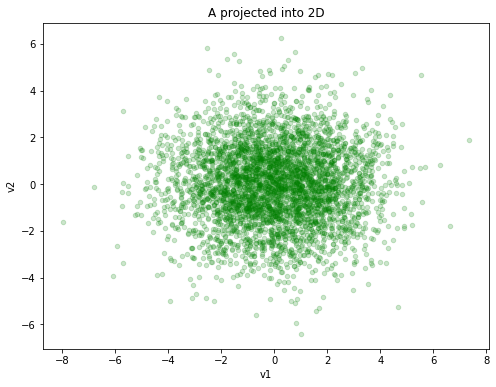

In [10]:
data.plot.scatter(figsize=(8,6),
                  x='v1',
                  y='v2',
                  alpha=0.2,
                  color='g',
                  title='A projected into 2D')

In [11]:
def frequentDirections(A,l):

    # initialize 0 matrix
    B = np.zeros([l*2, A.shape[1]])

    # copy first l-1 values into matrix
    B[:l-1, :] = A[:l-1,:]

    # init variables to track the count of 0 rows remaining
    r = A.shape[0]
    zeroRowCount = l + 1

    # for all remaining rows in A
    for i in range(l-1,r):

        # insert the i'th row of A in to the l'th row of B
        B[l-1, :] = A[i, :]
        zeroRowCount -= 1

        # check for no more zero-values rows    
        if zeroRowCount <= l:
            U, s, Vt = LA.svd(B ,full_matrices=False)
            delta = (s[l-1]) **2
            s[:l] = np.sqrt(s[:l]**2 - delta)
            B = np.dot(np.diag(s), Vt)

            zeroRowCount += 1
            
    return B

In [12]:
B = frequentDirections(A.to_numpy(), 10)

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


In [13]:
def calculateError(A, B):
    A_t = np.transpose(A)
    B_t = np.transpose(B)
    diff = np.linalg.norm(np.subtract(np.dot(A_t, A), np.dot(B_t, B)))
    return diff

In [14]:
calculateError(A,B)

5413.748309828258

In [15]:
def searchL(A, upperB=float('inf'), lowerB=1, errorCutoff=0):
    l=lowerB
    error_l = float('inf')
    
    if errorCutoff > 0:
        print("Error Threshold: {}".format(errorCutoff))
        print("")
        
    while l <= upperB and error_l > errorCutoff:
        B = frequentDirections(A.to_numpy(), l)
        error_l = calculateError(A,B)
        print("L={} Error: {}".format(l, error_l))
        l += 1
        
    if error_l <= errorCutoff:
        print("\nCutoff reached at L={}".format(l-1))
        
    return

In [16]:
searchL(A, errorCutoff=(np.linalg.norm(A, 'fro') **2 / 10))

Error Threshold: 6462.897613721931



C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


L=1 Error: 24588.196040625095
L=2 Error: 24573.59466303805
L=3 Error: 24569.601066983083
L=4 Error: 24532.90120524591
L=5 Error: 22738.28438886213
L=6 Error: 19976.98957779534
L=7 Error: 15068.788940405282
L=8 Error: 11593.135341230645
L=9 Error: 7850.558263746615
L=10 Error: 5413.748309828258

Cutoff reached at L=10


In [17]:
# then calculating the theoretical bound
np.linalg.norm(A, 'fro') ** 2

# thus we see that our error is less than
# the squared f norm of A divided by l

64628.97613721931

In [18]:
A_k = reduceToK(A, 2)
searchL(A, errorCutoff=(np.linalg.norm(np.subtract(A, A_k), 'fro') **2 / 10))

Error Threshold: 3788.2767953048365



C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


L=1 Error: 24588.196040625095
L=2 Error: 24573.59466303805
L=3 Error: 24569.601066983083
L=4 Error: 24532.90120524591
L=5 Error: 22738.28438886213
L=6 Error: 19976.98957779534
L=7 Error: 15068.788940405282
L=8 Error: 11593.135341230645
L=9 Error: 7850.558263746615
L=10 Error: 5413.748309828258
L=11 Error: 4230.324041245445
L=12 Error: 3547.281179694719

Cutoff reached at L=12
